In [1]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
env = gym.make("FrozenLake8x8-v1")
env.reset()
env.render()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

In [9]:
action_size = env.action_space.n
print("Action size: ", action_size) #prints 4

state_size = env.observation_space.n
print("State size: ", state_size) #prints 64

Action size:  4
State size:  64


In [10]:
qtable_history = []
score_history = []
qtable = np.zeros((state_size, action_size))

total_episodes = 250000       # Total episodes
learning_rate = 0.1           # Learning rate
max_steps = 400               # Max steps per episode
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001            # Minimum exploration probability
decay_rate = 0.00005             # Exponential decay rate for exploration prob

In [11]:
# codes referenced from https://cwong8.github.io/projects/FrozenLake/
# List of rewards
rewards = []
avg_rewards_per_100_ep_with_learning_rate_8 = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## Exploitation if bigger than epsilon (take biggest Q)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Explore
        else:
            action = env.action_space.sample()

        # Take the action and observe the outcome state and reward
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # New state is state
        state = new_state

        # Once done (dead), finish the episode
        if done == True:
            break

    # Reduce epsilon to explore less
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

    #keep track of rewards over epipsodes
    episode_count = episode + 1
    if episode_count % 100 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)

        #avg return over last 100 ep
        if episode_count >= 100 :
          past_100_rewards = rewards[(len(rewards)-100):len(rewards)]
          avg_past_100_rewards = (sum(past_100_rewards)/100)
          avg_rewards_per_100_ep_with_learning_rate_8.append(avg_past_100_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.50294
[[2.99832292e-03 3.04768382e-03 2.97679255e-03 5.43372066e-03]
 [3.80558876e-03 4.45891490e-03 6.58353787e-03 3.79967353e-03]
 [5.91566737e-03 5.56410056e-03 9.97730162e-03 5.50921559e-03]
 [9.14329834e-03 8.47910806e-03 1.52263338e-02 8.57873724e-03]
 [1.22990428e-02 1.39539179e-02 2.10413727e-02 1.21753620e-02]
 [1.66470540e-02 1.65752519e-02 2.61083958e-02 1.64980022e-02]
 [1.90308542e-02 3.30977203e-02 1.91345018e-02 1.91455329e-02]
 [2.12460445e-02 3.45401626e-02 2.11990350e-02 2.13222599e-02]
 [2.98280726e-03 2.97025771e-03 2.98730567e-03 4.93990720e-03]
 [3.51549819e-03 3.50844908e-03 5.80243822e-03 3.46836731e-03]
 [4.83618179e-03 4.86824515e-03 4.89082414e-03 8.45665986e-03]
 [6.92615034e-03 7.42058431e-03 7.49425647e-03 1.22536116e-02]
 [1.31237229e-02 1.32891039e-02 2.40250475e-02 1.32982533e-02]
 [1.76298855e-02 1.75534118e-02 2.96339668e-02 1.76818543e-02]
 [2.32691951e-02 4.50316380e-02 2.23668511e-02 2.36221671e-02]
 [3.28226944e-02 6.10097244e-0

In [13]:
# codes referenced from https://cwong8.github.io/projects/FrozenLake/
# List of rewards
rewards = []
avg_rewards_per_100_ep_with_learning_rate_1 = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## Exploitation if bigger than epsilon (take biggest Q)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Explore
        else:
            action = env.action_space.sample()

        # Take the action and observe the outcome state and reward
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        # New state is state
        state = new_state

        # Once done (dead), finish the episode
        if done == True:
            break

    # Reduce epsilon to explore less
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

    #keep track of rewards over episodes
    episode_count = episode + 1
    if episode_count % 100 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)

        #avg return over last 100 ep
        if episode_count >= 100 :
          past_100_rewards = rewards[(len(rewards)-100):len(rewards)]
          avg_past_100_rewards = (sum(past_100_rewards)/100)
          avg_rewards_per_100_ep_with_learning_rate_1.append(avg_past_100_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.500044
[[3.69444298e-03 4.01832607e-03 3.66317240e-03 6.28237137e-03]
 [4.84819372e-03 4.83906590e-03 8.61031324e-03 4.83785668e-03]
 [7.12239737e-03 6.62536143e-03 1.24934069e-02 6.76069858e-03]
 [1.01741333e-02 1.15941527e-02 1.56442541e-02 1.01777704e-02]
 [1.45233795e-02 1.44259303e-02 2.46207762e-02 1.45130798e-02]
 [1.85260329e-02 2.04997546e-02 3.42609228e-02 1.85762326e-02]
 [2.23530942e-02 2.27271437e-02 3.81012996e-02 2.32511742e-02]
 [2.24419633e-02 3.85062589e-02 2.25162931e-02 2.35547000e-02]
 [3.58923374e-03 3.88988818e-03 3.57091842e-03 5.35023798e-03]
 [4.40831771e-03 4.47854988e-03 4.53049701e-03 6.58734098e-03]
 [6.53765739e-03 5.58934194e-03 6.53668068e-03 9.35950884e-03]
 [6.27285651e-03 9.40040974e-03 5.43459511e-03 1.67883791e-02]
 [1.50144649e-02 1.49801694e-02 2.61667430e-02 1.49655894e-02]
 [2.04967947e-02 2.01432669e-02 3.78515962e-02 2.02805508e-02]
 [2.98862215e-02 4.52572409e-02 2.63277329e-02 2.66845019e-02]
 [5.19444520e-02 2.93037151e-

Text(0.5, 1.0, 'Avg score per 100 episodes vs. number of episodes')

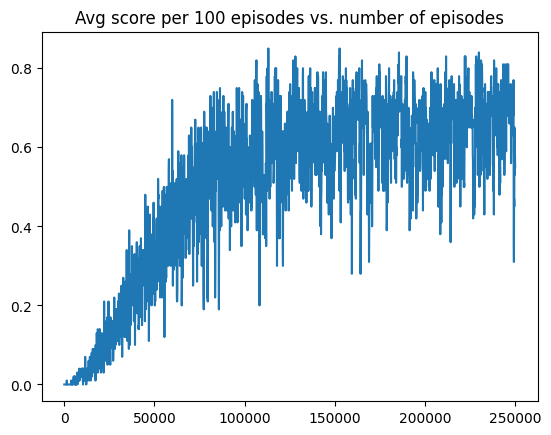

In [12]:
# Plotting score over time when learning rate is 0.8
plt.plot(list(range(0, 250000, 100)), avg_rewards_per_100_ep_with_learning_rate_8)
plt.title("Avg score per 100 episodes vs. number of episodes")

Text(0.5, 1.0, 'Avg score per 100 episodes vs. number of episodes')

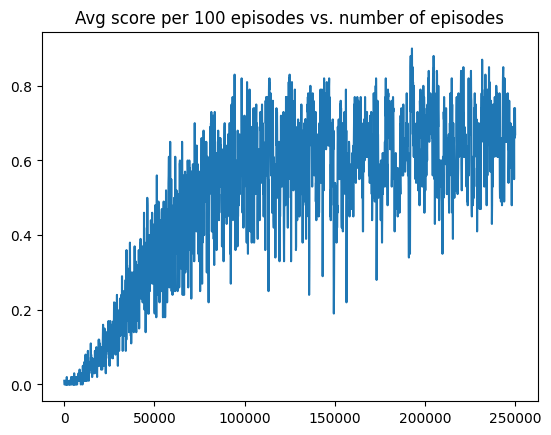

In [14]:
# Plotting score over time when learning rate is 0.1
plt.plot(list(range(0, 250000, 100)), avg_rewards_per_100_ep_with_learning_rate_1)
plt.title("Avg score per 100 episodes vs. number of episodes")